In [107]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

df=pd.read_csv('../Data/mnist_train.csv')
df.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
dg=df.copy()
dg['pixel0'][0] = None
print(dg.isnull().values.any())
print(df.isnull().values.any())

True
False


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [110]:
l = df['label']
d = df.drop("label",axis=1)

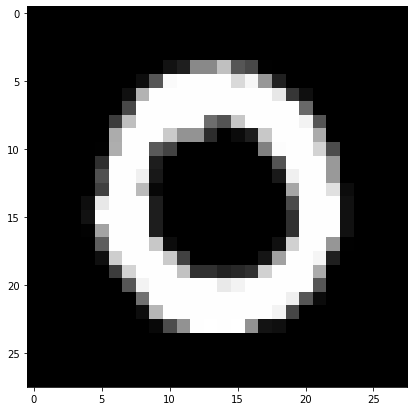

In [112]:
# display or plot a number.
plt.figure(figsize=(7,7))
i=1
grid_data = d.iloc[i].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

In [113]:
labels = l.head(10000)
data = d.head(10000)

print("the shape of sample data = ", data.shape)

the shape of sample data =  (10000, 784)


In [114]:
from sklearn.preprocessing import StandardScaler
std_data=StandardScaler().fit_transform(data)
std_data.shape

(10000, 784)

In [115]:
print(np.mean(std_data[:,232]))
print(np.std(std_data[:,232]))

-2.4868995751603506e-18
1.0


In [116]:
covar_matrix = np.matmul(std_data.T , std_data)/std_data.shape[0]

covar_matrix.shape

(784, 784)

In [117]:
from scipy.linalg import eigh
values, vectors = eigh(covar_matrix, eigvals=(782,783)) #to generate only the top 2 eigenvalues and vectors
vectors.shape

(784, 2)

In [118]:
new_data = np.matmul(std_data, vectors)
new_data.shape

(10000, 2)

In [119]:
new_data

array([[-5.44806854, -4.94972512],
       [ 6.83397157, 18.96637194],
       [-2.05100764, -7.52793502],
       ...,
       [-5.23560819, -1.54624293],
       [18.98113797,  2.42572751],
       [ 9.90093373, -0.22648625]])

In [120]:
labels 

0       1
1       0
2       1
3       4
4       0
       ..
9995    5
9996    0
9997    4
9998    7
9999    9
Name: label, Length: 10000, dtype: int64

In [121]:
new_data=np.vstack((new_data.T,labels)).T
new_data.shape

(10000, 3)

In [123]:
dataframe = pd.DataFrame(data=new_data, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.448069      -4.949725    1.0
1       6.833972      18.966372    0.0
2      -2.051008      -7.527935    1.0
3       5.555069      -0.715448    4.0
4       7.291958      26.253689    0.0


/home/sims/Learn/AI/envAI/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


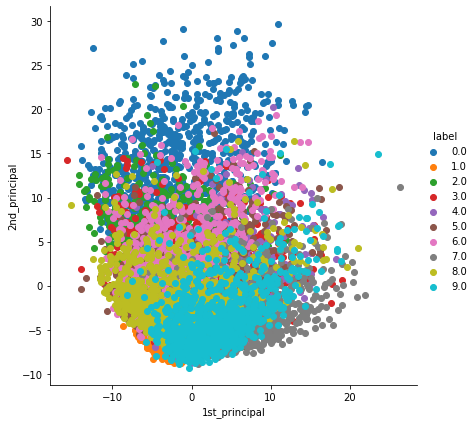

In [124]:
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [125]:
std_data.shape

(10000, 784)

In [126]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components=2
pca_data=pca.fit_transform(std_data)

/home/sims/Learn/AI/envAI/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


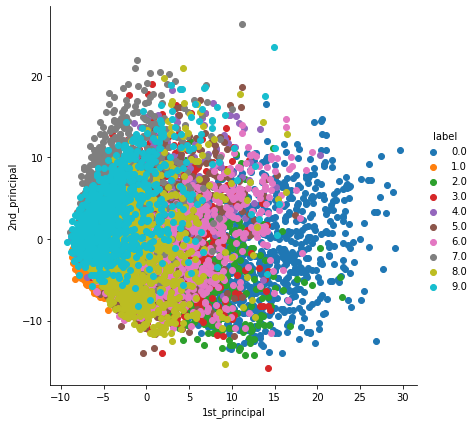

In [127]:
pca_data = np.vstack((pca_data.T, labels)).T
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()